# 模型训练

In [1]:
import pandas as pd

df_nofill = pd.read_csv('data/nofill.csv')
df_fill_f1 = pd.read_csv('data/fill_f1.csv')
df_fill_knn = pd.read_csv('data/fill_knn.csv')
df_fill_iterative = pd.read_csv('data/fill_iterative.csv')
df_nofill, df_fill_f1, df_fill_knn, df_fill_iterative

(       CR   Lms   SSA   PW    CD      Cs
 0    1.39  2.56  64.8  0.5   1.0  431.82
 1    1.39  2.56  64.8  0.5   2.0  398.88
 2    1.39  2.56  64.8  0.5   3.0  312.18
 3    1.39  2.56  64.8  0.5   5.0  272.00
 4    1.39  2.56  64.8  0.5   7.0  230.70
 ..    ...   ...   ...  ...   ...     ...
 199  1.54  2.41  21.1  1.0   1.0  129.20
 200  1.54  2.41  21.1  1.0   1.5  115.10
 201  1.54  2.41  21.1  1.0   3.0  102.30
 202  1.54  2.41  21.1  1.0   5.0   92.00
 203  1.54  2.41  21.1  1.0  10.0   73.80
 
 [204 rows x 6 columns],
        CR   Lms   SSA  Rct   PW    CD      Cs
 0    1.39  2.56  64.8  0.5  0.5   1.0  431.82
 1    1.39  2.56  64.8  0.5  0.5   2.0  398.88
 2    1.39  2.56  64.8  0.5  0.5   3.0  312.18
 3    1.39  2.56  64.8  0.5  0.5   5.0  272.00
 4    1.39  2.56  64.8  0.5  0.5   7.0  230.70
 ..    ...   ...   ...  ...  ...   ...     ...
 204  1.54  2.41  21.1  3.1  1.0   1.0  129.20
 205  1.54  2.41  21.1  3.1  1.0   1.5  115.10
 206  1.54  2.41  21.1  3.1  1.0   3.0  102.30

定义一个函数便于处理DataFrame

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定义一个函数来处理DataFrame
def process_df(df):
    # 分离特征和目标值
    X = df.drop('Cs', axis=1)
    y = df['Cs']
    
    # 标准化特征
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)
   
    # 返回训练好的模型和测试集，以便进一步评估
    return X_train, X_test, y_train, y_test

定义一个函数来计算模型的评估指标

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):
    """
    Calculate and return actual vs pred fig for data_dopants metrics.
    """
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    rmse = root_mean_squared_error(y_true, y_pred)
    return r2, mae, mape, rmse


def metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, model_name):
    R2_train, MAE_train, MAPE_train, RMSE_train = calculate_metrics(y_train, y_train_pred)
    R2_test, MAE_test, MAPE_test, RMSE_test = calculate_metrics(y_test, y_test_pred)
    metrics = {'model': model_name,
                   'R2_train': R2_train, 'MAE_train': MAE_train, 'MAPE_train': MAPE_train, 'RMSE_train': RMSE_train,
                   'R2_test': R2_test, 'MAE_test': MAE_test, 'MAPE_test': MAPE_test, 'RMSE_test': RMSE_test}
    model_name_df = pd.DataFrame([metrics])
    return model_name_df

def plot_actual_vs_predicted(y_train, y_pred_train, y_test, y_pred_test, figtitle, figpath=None):
    """
    Plot the actual vs predicted values for both training and test sets,
    and plot y=x as the fit line.
    """
    # 设置全局字体为Times New Roman，字号为32，字体粗细为粗体
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 32,
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })

    # 绘制训练集和测试集的散点图
    plt.scatter(y_train, y_pred_train, color='blue', label='Train', s=50, alpha=0.5)
    plt.scatter(y_test, y_pred_test, color='red', label='Test', s=50, alpha=0.5)

    # 计算合并数据的最小值和最大值，用于设置坐标轴范围和绘制y=x线
    y_pred_train = y_pred_train.ravel()
    y_pred_test = y_pred_test.ravel()
    y_combined = np.concatenate([y_train, y_pred_train, y_test, y_pred_test])
    min_val, max_val = np.min(y_combined), np.max(y_combined)
    padding = (max_val - min_val) * 0.05
    padded_min, padded_max = min_val - padding, max_val + padding

    # 绘制y=x的虚线，线宽为3
    plt.plot([padded_min, padded_max], [padded_min, padded_max], 'k--', lw=3, label='Regression Line')

    # 设置标题和轴标签，明确指定加粗
    plt.title(figtitle, fontweight='bold', pad=20) # pad=20避免标题和轴线重合
    plt.xlabel('Actual Values', fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')

    # 设置图例，无边框，位于左上角
    plt.legend(frameon=False, loc='upper left', fontsize=28)

    # 设置坐标轴为相同比例，并且坐标轴范围一致
    plt.axis('equal')
    plt.xlim([padded_min, padded_max])
    plt.ylim([padded_min, padded_max])

    # 设置刻度线的长度和粗细
    plt.tick_params(axis='both', which='major', length=10, width=2, labelsize=32)

    # 检查并统一X轴和Y轴的刻度
    # 可以通过设置两个轴的相同刻度，或者根据数据自动选择刻度
    x_ticks = np.arange(0, max(y_combined) + 1, 200)  # 可以根据数据范围调整
    y_ticks = np.arange(0, max(y_combined) + 1, 200)  # 使得X和Y轴的刻度间隔相同

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # 设置图形边界的宽度和可见性
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)
        spine.set_color('black')

    # 保存图像，背景透明，紧凑布局
    plt.savefig(figpath, bbox_inches='tight', transparent=True)
    plt.show()

## 1. nofill

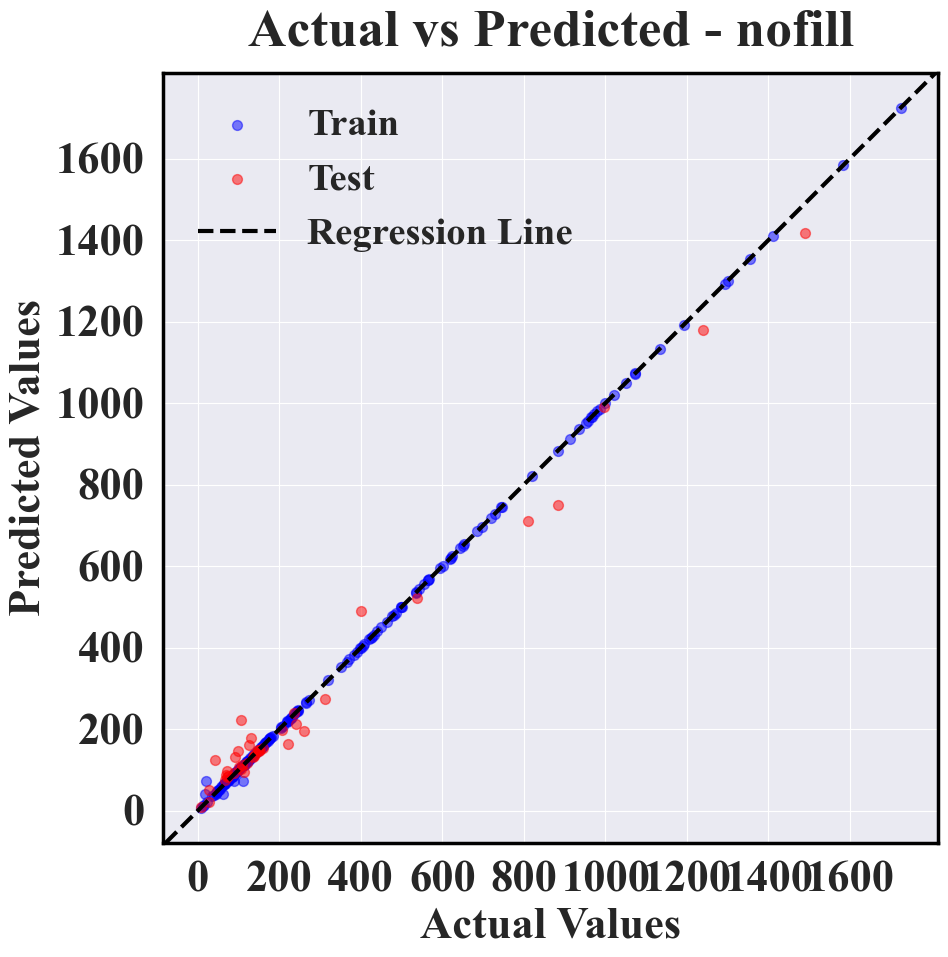

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,nofill,0.999744,0.974272,3.047813,5.87279,0.981547,29.635988,21.767427,45.31998


In [22]:
import xgboost as xgb

# 处理DataFrame
X_train, X_test, y_train, y_test = process_df(df_nofill)

# 训练模型
model_nofill = xgb.XGBRegressor(
                   n_estimators=100,
                   learning_rate=0.5,
                   # subsample=0.5,
                   # gamma=0.1,
                   # max_depth=6,
                   # min_child_weight=1,
                   # reg_alpha=0.3,
                   # colsample_bytree=0.7,
                   # colsample_bylevel=0.1,
                   # colsample_bynode=0.7,
                   random_state=21)
model_nofill.fit(X_train, y_train)
y_train_pred = model_nofill.predict(X_train)
y_test_pred = model_nofill.predict(X_test)

# 计算模型评估指标
metrics_nofill = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'nofill')

# 绘制实际值与预测值的图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Actual vs Predicted - nofill', 'output/figures/nofill.png')
metrics_nofill

## 2. fill_f1

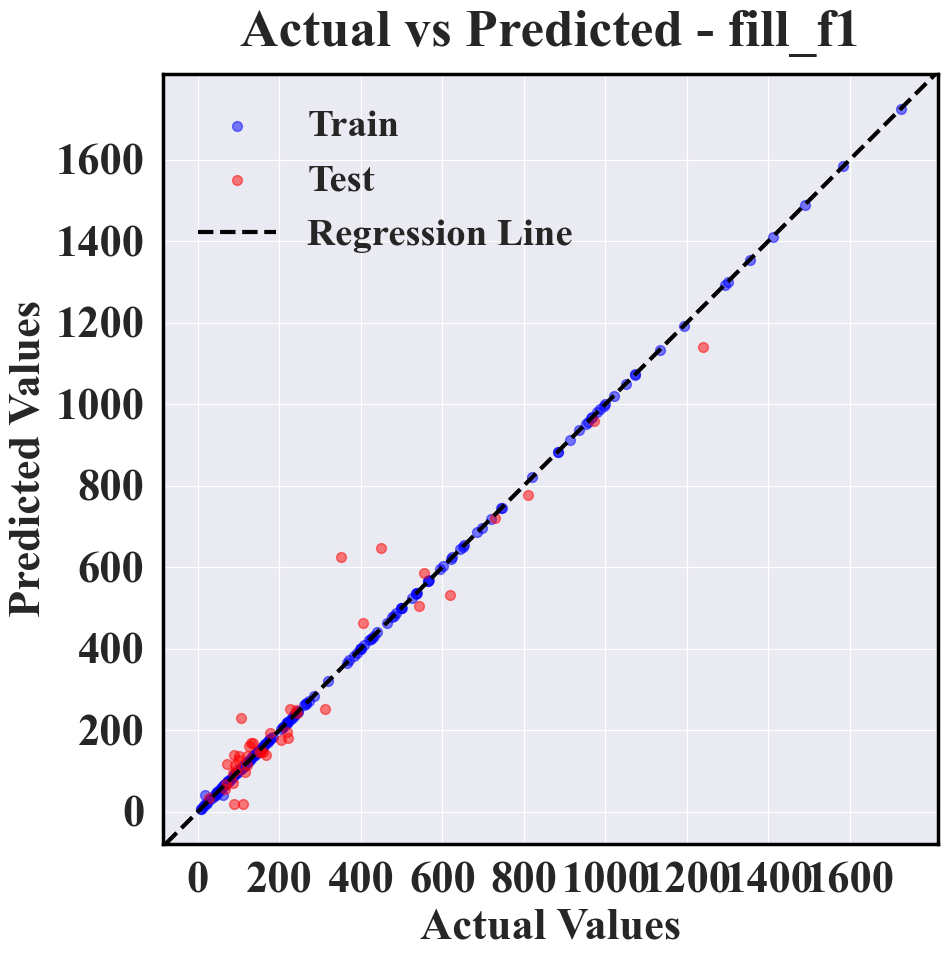

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,fill_f1,0.999957,0.491437,1.183086,2.472809,0.936155,42.138978,23.295277,67.015428


In [7]:
# 处理DataFrame
X_train, X_test, y_train, y_test = process_df(df_fill_f1)

# 训练模型
model_fill_f1 = xgb.XGBRegressor()
model_fill_f1.fit(X_train, y_train)
y_train_pred = model_fill_f1.predict(X_train)
y_test_pred = model_fill_f1.predict(X_test)

# 计算模型评估指标
metrics_fill_f1 = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'fill_f1')

# 绘制实际值与预测值的图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Actual vs Predicted - fill_f1', 'output/figures/fill_f1.png')
metrics_fill_f1

## 3. fill_knn

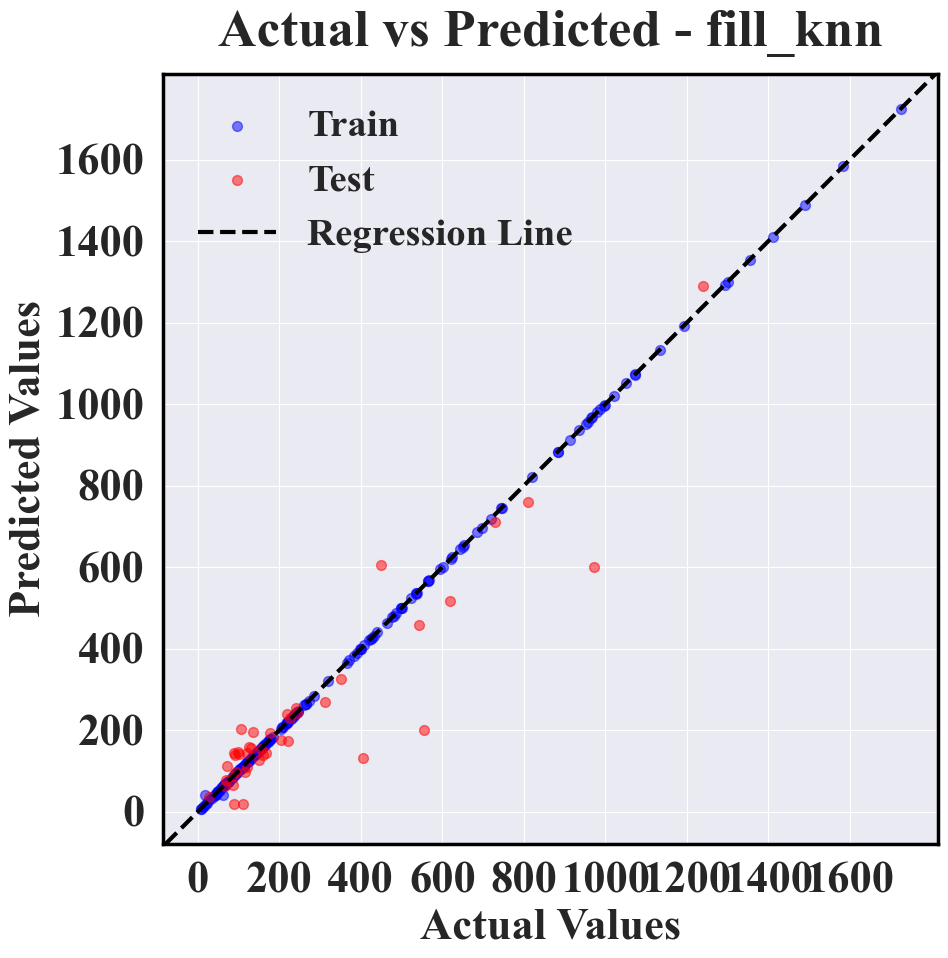

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,fill_knn,0.999957,0.504901,1.188119,2.473623,0.853302,57.875568,25.984441,101.583596


In [8]:
# 处理DataFrame
X_train, X_test, y_train, y_test = process_df(df_fill_knn)

# 训练模型
model_fill_knn = xgb.XGBRegressor()
model_fill_knn.fit(X_train, y_train)
y_train_pred = model_fill_knn.predict(X_train)
y_test_pred = model_fill_knn.predict(X_test)

# 计算模型评估指标
metrics_fill_knn = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'fill_knn')

# 绘制实际值与预测值的图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Actual vs Predicted - fill_knn', 'output/figures/fill_knn.png')
metrics_fill_knn

## 4. fill_iterative

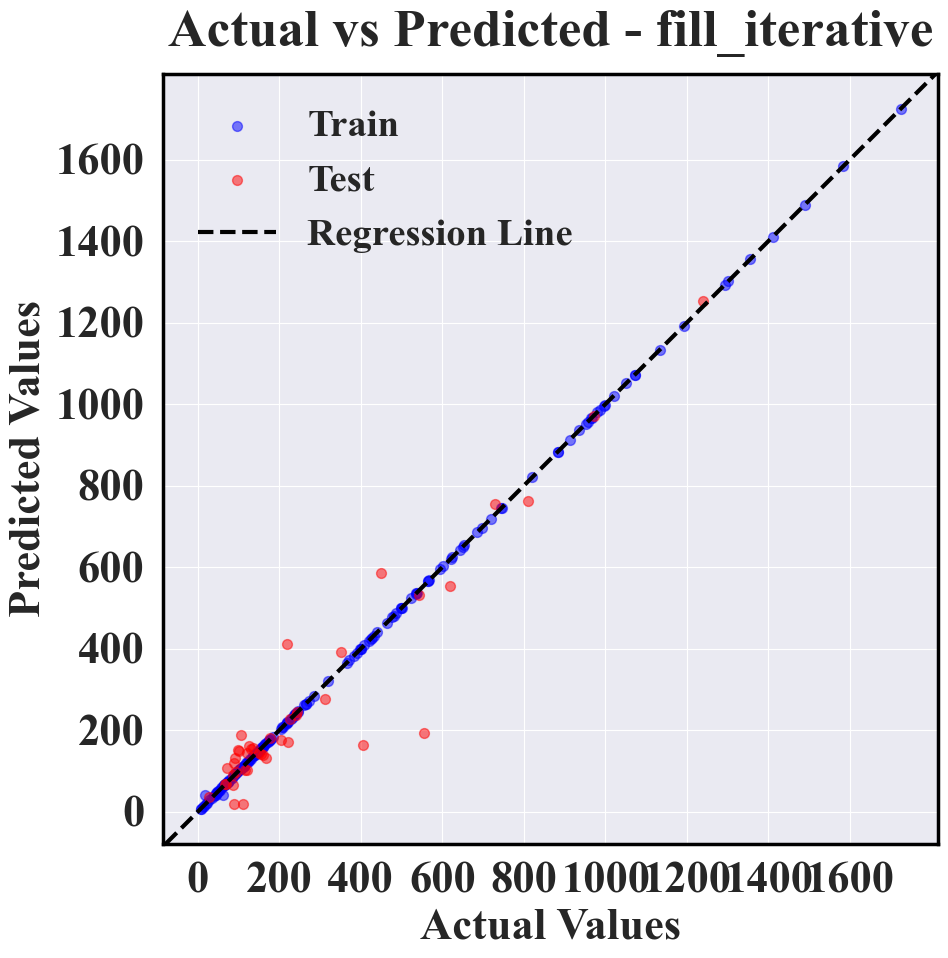

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,fill_iterative,0.999956,0.585948,1.263569,2.490806,0.900729,46.718644,24.185933,83.564604


In [9]:
# 处理DataFrame\
X_train, X_test, y_train, y_test = process_df(df_fill_iterative)

# 训练模型
model_fill_iterative = xgb.XGBRegressor()
model_fill_iterative.fit(X_train, y_train)
y_train_pred = model_fill_iterative.predict(X_train)
y_test_pred = model_fill_iterative.predict(X_test)

# 计算模型评估指标
metrics_fill_iterative = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'fill_iterative')

# 绘制实际值与预测值的图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Actual vs Predicted - fill_iterative', 'output/figures/fill_iterative.png')
metrics_fill_iterative